In [1]:
%pylab inline
from PIL import Image
import os
from io import BytesIO
from keras.preprocessing import image
import cv2
import hashlib
import time

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [6]:
def split_88(image_data):
    blocks = []
    #image_size = image_data.shape[0]
    image_size = min(image_data.shape[0],image_data.shape[1])
    for i in range(int(image_size / 8)):
        row = image_data[8*i:8*(i+1), :]
        for j in range(int(image_size / 8)):
            col = row[:, 8*j:8*(j+1)]
            blocks.append(col.astype(float32))
    return array(blocks)

def merge_88(blocks):
    block_count = blocks.shape[0]
    edge_len = int(sqrt(block_count))
    img_size = 8*edge_len
    image_rows = []
    for i in range(edge_len):
        img_row = hstack(blocks[edge_len*i: edge_len*(i+1), ...])
        image_rows.append(img_row)
    return vstack(image_rows)

def split_1616(image_data):
    blocks = []
    image_size = image_data.shape[0]
    for i in range(int(image_size / 16)):
        row = image_data[16*i:16*(i+1), :]
        for j in range(int(image_size / 16)):
            col = row[:, 16*j:16*(j+1)]
            blocks.append(col.astype(float32))
    return array(blocks)

def merge_1616(blocks):
    block_count = blocks.shape[0]
    edge_len = int(sqrt(block_count))
    img_size = 16*edge_len
    image_rows = []
    for i in range(edge_len):
        img_row = hstack(blocks[edge_len*i: edge_len*(i+1), ...])
        image_rows.append(img_row)
    return vstack(image_rows)

def zig_zag_flatten(a):
    return np.concatenate([np.diagonal(a[::-1,:], i)[::(2*(i % 2)-1)] for i in range(1-a.shape[0], a.shape[0])])

def image_generator(images_dir, target_size=None):
    count = 0
    while True:
        print("Data round %s" % count)
        for filename in os.listdir(images_dir):
            img = Image.open("%s/%s" % (images_dir, filename))
            #print("%s/%s" % (images_dir, filename))
            if target_size is not None:
                img = img.resize(target_size)
#             img = image.load_img('%s/%s' % (images_dir, filename), target_size=target_size)

            f = BytesIO()
            img.save(f, format='JPEG', quality=75)
            bytes_content = f.getvalue()
            origin_file_size = len(bytes_content)
            yield img, origin_file_size
        count += 1

0
Data round 0
compress_rate : 0.5664419613999446
1
compress_rate : 0.5745284124194493
2
compress_rate : 0.5150697911731477
3
compress_rate : 0.6284196771066054
4
compress_rate : 0.6994190319532426
5
compress_rate : 0.5388406477352734
6
compress_rate : 0.416479119779945
7
compress_rate : 0.5092671248745076
8
compress_rate : 0.5562147361433787
9
compress_rate : 0.17974485497653148
10
compress_rate : 0.6431969399890713
11
compress_rate : 0.44292350266851155
12
compress_rate : 0.5574459724950884
13
compress_rate : 0.44316607535056596
14
compress_rate : 0.717580004943513
15
compress_rate : 0.5275093153237075
16
compress_rate : 0.7850770343640612
17
compress_rate : 0.4862423281153024
18
compress_rate : 0.5
19
compress_rate : 0.4302602660497397
20
compress_rate : 0.4164884028361976
21
compress_rate : 0.47574787159259546
22
compress_rate : 0.49890992100133374
23
compress_rate : 0.7009709323362683
24
compress_rate : 0.4955897492974206
25
compress_rate : 0.5167709147771696
26
compress_rate : 0.

compress_rate : 0.32328239822699173
214
compress_rate : 0.35721800097884426
215
compress_rate : 0.80468656118566
216
compress_rate : 0.4000235155790711
217
compress_rate : 0.5494286767416144
218
compress_rate : 0.6335857679741648
219
compress_rate : 0.6208542873512
220
compress_rate : 0.6284801058084426
221
compress_rate : 0.7931463929418859
222
compress_rate : 0.40346331704437377
223
compress_rate : 0.4414052960262359
224
compress_rate : 0.46233435270132517
225
compress_rate : 0.5565770220977497
226
compress_rate : 0.490242324480587
227
compress_rate : 0.5966327295165058
228
compress_rate : 0.600286372687205
229
compress_rate : 0.8272552280435267
230
compress_rate : 0.557114305480821
231
compress_rate : 0.48416496945010185
232
compress_rate : 0.5044912923923006
233
compress_rate : 0.6286839950880065
234
compress_rate : 0.5499563971595864
235
compress_rate : 0.357182182093295
236
compress_rate : 0.7269398300380066
237
compress_rate : 0.5169193203784719
238
compress_rate : 0.38256544810

compress_rate : 0.6365223602238006
424
compress_rate : 0.6516066581090465
425
compress_rate : 0.5443161616753599
426
compress_rate : 0.35970322136305294
427
compress_rate : 0.42755551135092124
428
compress_rate : 0.572481746650599
429
compress_rate : 0.4647171814183895
430
compress_rate : 0.4920600153323842
431
compress_rate : 0.19721825962910128
432
compress_rate : 0.40187019310573785
433
compress_rate : 0.4882842387146136
434
compress_rate : 0.4299770114942529
435
compress_rate : 0.6741181119950514
436
compress_rate : 0.5539625384030921
437
compress_rate : 0.37914843977836105
438
compress_rate : 0.6919550411165507
439
compress_rate : 0.484890033018076
440
compress_rate : 0.7048343278513559
441
compress_rate : 0.4144884792626728
442
compress_rate : 0.5146706586826347
443
compress_rate : 0.8379451977719012
444
compress_rate : 0.566000229366566
445
compress_rate : 0.5380042074453489
446
compress_rate : 0.2954703689208396
447
compress_rate : 0.5296283454686546
448
compress_rate : 0.73364

compress_rate : 0.6643104110641568
635
compress_rate : 0.3851959957129501
636
compress_rate : 0.5642923219241444
637
compress_rate : 0.3955933653656289
638
compress_rate : 0.48126003926467964
639
compress_rate : 0.8785748445719751
640
compress_rate : 0.7094885350710026
641
compress_rate : 0.39865785189860803
642
compress_rate : 0.6395769682726204
643
compress_rate : 0.4847381487173425
644
compress_rate : 0.4600189206234796
645
compress_rate : 0.5433976764160752
646
compress_rate : 0.6259278521110113
647
compress_rate : 0.5527177686654178
648
compress_rate : 0.5113611172688982
649
compress_rate : 0.543306394940267
650
compress_rate : 0.4866503214347767
651
compress_rate : 0.5138308364251163
652
compress_rate : 0.5861083081062899
653
compress_rate : 0.45871125949124
654
compress_rate : 0.4523710702572491
655
compress_rate : 0.4468020550993163
656
compress_rate : 0.7500268301117325
657
compress_rate : 0.42189028420356905
658
compress_rate : 0.6346755307093752
659
compress_rate : 0.4941639

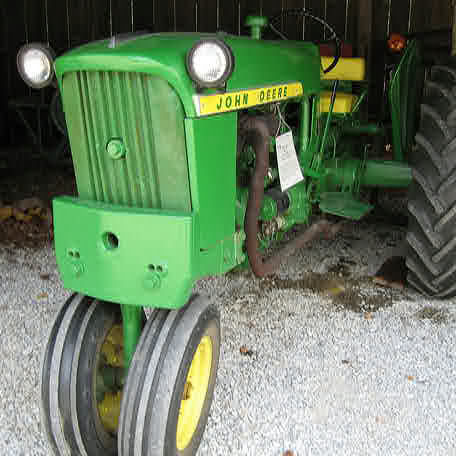

In [7]:
generator = image_generator('/home/imagenet-data/train/n04465501')
start = time.clock()
compress_rates = []
for i in range(800):
    print(i)
    origin_image, origin_image_size= next(generator)
    #print("origin_image_size :",origin_image_size)

    # DeepN-JPEG
    img_yuv = origin_image.convert('YCbCr')
    channels = img_yuv.split()

    rec_channels = []
    q_tables = []
    for channel in channels:
        # split and shift
        blocks = split_88(asarray(channel)) - 128
        # dct and get std_matrix
        dct_blocks = array([cv2.dct(item) for item in blocks])
        std_matrix = zeros([8, 8])
        for i in range(8):
            for j in range(8):
                std_matrix[i, j] = std(dct_blocks[:,i,j], ddof=1)

        # Build Q-table
        q_table = zeros([8, 8], dtype=int64)
        a = 255
        b = 80
        c = 240
        T1 = 20
        T2 = 60
        k1 = 9.75
        k2 = 1
        k3 = 3
        Qmin = 5
        for i in range(8):
            for j in range(8):
                std_value = std_matrix[i, j]
                if std_value <= T1:
                    q = a - k1 * std_value
                elif std_value > T2:
                    q = c - k3 * std_value
                else:
                    q = b - k2 * std_value
                q = (q if (q > Qmin) else Qmin)
                q_table[i, j] = q
        
        q_tables.append(q_table)

        # quantization by q-table and recovery from q-table
        quantizd_dct_blocks = np.round(array([block / q_table for block in dct_blocks]))
        rec_dct_blocks = array([block * q_table for block in quantizd_dct_blocks])
        # idct, round and shift
        idct_rec_blocks = np.round(array([cv2.idct(block) for block in rec_dct_blocks])) + 128
        # merge into an image
        rec_channel = merge_88(idct_rec_blocks)
        
        rec_channels.append(clip(rec_channel, 0, 255))

    rec_channels = array(rec_channels, dtype=uint8)

    pil_channels = [Image.fromarray(channel) for channel in rec_channels]

    # image and compress image
    rec_image = Image.merge("YCbCr", channels).convert('RGB')
    rec_pil_image = Image.merge("YCbCr", pil_channels).convert('RGB')

    # compute file size
    rec_pil_image
    f2 = BytesIO()
    rec_pil_image.save(f2, format='JPEG', quality=75)#qtables=pil_qtables)
    rec_pil_image_size = len(f2.getvalue())

    # compute compress_rate
    #print("rec_pil_image_size :",rec_pil_image_size)
    #print("origin_image_size :",origin_image_size)

    compress_rate = (rec_pil_image_size/origin_image_size)
    print("compress_rate :",compress_rate)
    compress_rates.append(compress_rate)
end = time.clock()
print("runing time",end-start)
rec_pil_image

In [8]:
print(len(compress_rates),mean(compress_rates))

800 0.5426381622140393
